In [6]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
#%load_ext google.colab.data_table #extension permettant d'examiner plus facilement les dataset grace à l'ajout d'une case "Filter"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#%pip install regex==2021.8.3
#%pip install regex==2022.1.18
#%pip install bokeh==3.2.0
#%pip install bokeh ==2.0.5
#%pip install typing-extensions
#%pip install typing-extensions==4.3.0
#%pip install cohere
#%pip install openai
#%pip install tiktoken
#%pip install fastapi
#%pip install kaleido
#%pip install python-multipart
#%pip install uvicorn
#%pip install sqlalchemy


In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
%pip install dataprep #librairie permettant de faire l'analyse exploratoire des donnés
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
%pip install kneed #librairie permettant de calculer le numbre de cluster

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 63.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.1 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1252697 sha256=ac034ca75

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projet 9/volaille2017.csv', index_col=0)
# index_col=0 supprime l'apparition de la colonne unnamed_0 du a un problème de header

In [10]:
df.head()


,Zone,Quantite_exporte_de_france,Stabilite_politique,PIB_par_hab_2017_euro,Evo_PIB_5ans,Dispo_alim(Kg/Pers/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture_total,Production,Distance_france,Droit de douane,tva,taux_impot_sur_vente,Doing_business_index
0,Afghanistan,0.0,-2.80,498.34,-20.054736,1.53,5.700000e+07,0.0,29000000.0,5.500000e+07,2.800000e+07,5590.3810,7.02,0.0,10.0,44.06
1,Afrique du Sud,0.0,-0.28,6330.41,-17.609702,35.69,2.118000e+09,63000000.0,514000000.0,2.035000e+09,1.667000e+09,9353.5520,4.51,15.0,15.0,67.02
2,Albanie,440.0,0.38,4259.17,6.671974,16.36,4.700000e+07,0.0,38000000.0,4.700000e+07,1.300000e+07,1603.5340,0.85,20.0,20.0,67.75
3,Algérie,51470.0,-0.92,3886.84,-26.303107,6.38,2.770000e+08,0.0,2000000.0,2.640000e+08,2.750000e+08,1340.3900,8.85,19.0,19.0,48.60
4,Allemagne,1313490.0,0.59,41973.43,1.816712,19.47,1.739000e+09,646000000.0,842000000.0,1.609000e+09,1.514000e+09,439.8984,1.79,19.0,19.0,79.71


Description du dataset :
* Zone : pays
* Quantite_exporte_de_france : quantité de poulet exporté par la france en kg
* Stabilité politique : indice de stabilité politique
* PIB_par_hab_2017_euro : PIB par habitant pour l'année 2017 en euro
* Evo_PIB_5ans : Evolution du PIB/habitant de 2012 à 2017
* Dispo_alim(kg/Pers/an) : Quantité de nourriture disponible pour la consommation huamine d'un pays en Kg par personne et par an
* Disponibilité intérieure : Quantité de nourriture disponible pour la consommation humaine d'un pays après avoir pris en compte les exportations en kg
* Exportation - quantité : Exportation de poulet du pays en kg
* Importations - quantité : Importation de poulet par pays en kg
* Nourriture_total : Poids de poulets total disponible pour la nourriture humaine du pays en kg
* Production :Poids de poulet produit par le pays en kg
* Distance_france : Distance entre la capitale du pays et Paris en km
* Droit de douane : Montant des droit de douane en %
* tva : TVA en %
* Taux_impot_sur_vente :Taux d'impot sur les ventes en %
* Doing_business_index :Plus l'index est élevé, plus il est facile de faire du business avec un pays

In [11]:
#renommage de la colonne tonnage exporte pour quelle soit plus explicite
df.rename(columns={'tonnage exporte':'tonnage exporte de France', 'Evo_PIB_5ans':'Evolution PIB/Habitant'}, inplace = True)

In [12]:
df.shape

(169, 16)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 171
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Zone                        169 non-null    object 
 1   Quantite_exporte_de_france  169 non-null    float64
 2   Stabilite_politique         169 non-null    float64
 3   PIB_par_hab_2017_euro       169 non-null    float64
 4   Evolution PIB/Habitant      169 non-null    float64
 5   Dispo_alim(Kg/Pers/an)      169 non-null    float64
 6   Disponibilité intérieure    169 non-null    float64
 7   Exportations - Quantité     169 non-null    float64
 8   Importations - Quantité     169 non-null    float64
 9   Nourriture_total            169 non-null    float64
 10  Production                  169 non-null    float64
 11  Distance_france             169 non-null    float64
 12  Droit de douane             169 non-null    float64
 13  tva                         169 non

In [14]:
df.isna().mean()

Zone                          0.0
Quantite_exporte_de_france    0.0
Stabilite_politique           0.0
PIB_par_hab_2017_euro         0.0
Evolution PIB/Habitant        0.0
Dispo_alim(Kg/Pers/an)        0.0
Disponibilité intérieure      0.0
Exportations - Quantité       0.0
Importations - Quantité       0.0
Nourriture_total              0.0
Production                    0.0
Distance_france               0.0
Droit de douane               0.0
tva                           0.0
taux_impot_sur_vente          0.0
Doing_business_index          0.0
dtype: float64

In [15]:
df.duplicated().sum()

0

In [16]:
df.nunique()

Zone                          169
Quantite_exporte_de_france     62
Stabilite_politique           132
PIB_par_hab_2017_euro         169
Evolution PIB/Habitant        169
Dispo_alim(Kg/Pers/an)        167
Disponibilité intérieure      133
Exportations - Quantité        47
Importations - Quantité        83
Nourriture_total              128
Production                    122
Distance_france               168
Droit de douane               133
tva                            29
taux_impot_sur_vente           30
Doing_business_index          158
dtype: int64

In [17]:
df = df.set_index('Zone')

In [18]:
X = df.values
X[:5]

array([[ 0.00000000e+00, -2.80000000e+00,  4.98340000e+02,
        -2.00547364e+01,  1.53000000e+00,  5.70000000e+07,
         0.00000000e+00,  2.90000000e+07,  5.50000000e+07,
         2.80000000e+07,  5.59038100e+03,  7.02000000e+00,
         0.00000000e+00,  1.00000000e+01,  4.40600000e+01],
       [ 0.00000000e+00, -2.80000000e-01,  6.33041000e+03,
        -1.76097019e+01,  3.56900000e+01,  2.11800000e+09,
         6.30000000e+07,  5.14000000e+08,  2.03500000e+09,
         1.66700000e+09,  9.35355200e+03,  4.51000000e+00,
         1.50000000e+01,  1.50000000e+01,  6.70200000e+01],
       [ 4.40000000e+02,  3.80000000e-01,  4.25917000e+03,
         6.67197378e+00,  1.63600000e+01,  4.70000000e+07,
         0.00000000e+00,  3.80000000e+07,  4.70000000e+07,
         1.30000000e+07,  1.60353400e+03,  8.50000000e-01,
         2.00000000e+01,  2.00000000e+01,  6.77500000e+01],
       [ 5.14700000e+04, -9.20000000e-01,  3.88684000e+03,
        -2.63031074e+01,  6.38000000e+00,  2.77000000

suppression de \xa0 des donnés

In [19]:
X.shape

(169, 15)

In [20]:
names = df.index
names

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen', 'Zambie',
       'Zimbabwe', 'Égypte', 'Émirats arabes unis', 'Équateur', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=169)

In [21]:
features = df.columns
features

Index(['Quantite_exporte_de_france', 'Stabilite_politique',
       'PIB_par_hab_2017_euro', 'Evolution PIB/Habitant',
       'Dispo_alim(Kg/Pers/an)', 'Disponibilité intérieure',
       'Exportations - Quantité', 'Importations - Quantité',
       'Nourriture_total', 'Production', 'Distance_france', 'Droit de douane',
       'tva', 'taux_impot_sur_vente', 'Doing_business_index'],
      dtype='object')

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(X)

StandardScaler()

In [24]:
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-0.10584007, -3.0526938 , -0.70969505, -0.9231118 , -1.17986804,
        -0.47690677, -0.30914478, -0.31211545, -0.47431322, -0.50342483,
        -0.108508  ,  0.24975855, -3.12089339, -1.10038967, -1.57931418],
       [-0.10584007, -0.24498553, -0.37969022, -0.83622441,  1.01588559,
         2.25298065,  0.04273297,  2.31415938,  2.31981193,  1.71882806,
         0.84321323, -0.33194177, -0.16868907, -0.14175338,  0.21111447],
       [-0.10576566,  0.49036663, -0.49689032,  0.02665555, -0.22661785,
        -0.49015222, -0.30914478, -0.26338046, -0.48560262, -0.52376271,
        -1.1167978 , -1.18015816,  0.81537903,  0.81688291,  0.26804012],
       [-0.09713606, -0.9580543 , -0.51795844, -1.14515554, -0.8681173 ,
        -0.18550685, -0.30914478, -0.45832044, -0.17937779, -0.16852766,
        -1.18334798,  0.67386675,  0.61856541,  0.62515565, -1.22528343],
       [ 0.11628209,  0.72434232,  1.63715265, -0.14588229, -0.02671171,
         1.75097807,  3.29899846,  4.09027927, 

In [25]:
X_scaled = scaler.fit_transform(X)

In [26]:
#vérification que les moyennes sont bien à 0 et les ecartypes à 1
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
mean,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [27]:
n_components = 14

In [28]:
pca = PCA(n_components=n_components)

In [29]:
pca.fit(X_scaled)

PCA(n_components=14)

In [30]:
pca.explained_variance_ratio_

array([0.26632944, 0.17720518, 0.14157858, 0.09093196, 0.06617219,
       0.05946149, 0.04663007, 0.03602816, 0.03348603, 0.02806052,
       0.02332538, 0.01863977, 0.01110369, 0.00080277])

In [31]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([26.63, 17.72, 14.16,  9.09,  6.62,  5.95,  4.66,  3.6 ,  3.35,
        2.81,  2.33,  1.86,  1.11,  0.08])

In [32]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 27.,  44.,  59.,  68.,  74.,  80.,  85.,  88.,  92.,  95.,  97.,
        99., 100., 100.])

In [33]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

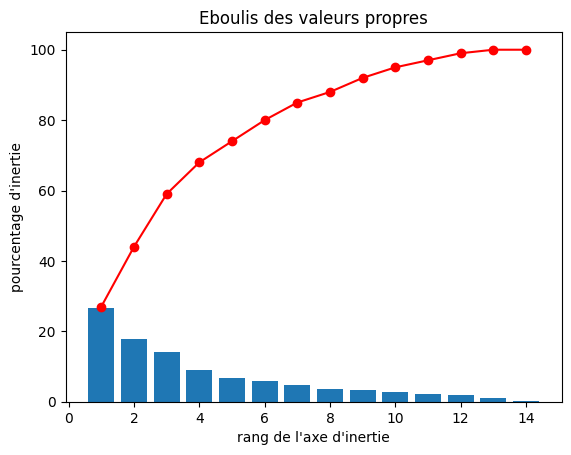

In [34]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

L'éboulis des valeurs propres montre que 7 composantes principales expliquent 84% de l'inertie

In [35]:
pcs = pca.components_

In [36]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.113588,0.118928,0.244081,-0.114854,0.181727,0.393628,0.282433,0.330881,0.397079,0.401332,-0.109639,-0.260568,0.107567,0.091640,0.323023
1,-0.162376,-0.369863,-0.336660,-0.035183,-0.083383,0.345756,-0.109698,0.091646,0.343892,0.306222,0.251703,0.248717,-0.287281,-0.277889,-0.279864
2,-0.081235,0.357930,0.239546,0.080293,0.392211,-0.075304,-0.050058,0.091342,-0.069186,-0.106218,0.367634,-0.076285,-0.465544,-0.487777,0.139314
3,0.638455,-0.159000,-0.003278,0.028233,-0.196557,-0.134580,0.509797,0.263949,-0.121365,-0.083900,-0.102337,0.069201,-0.254432,-0.219319,-0.173523
4,0.059415,0.064273,-0.065155,0.935665,-0.119672,0.081280,0.096831,-0.126060,0.059807,0.133917,0.140104,-0.017103,0.119665,0.002889,0.103292
5,0.297453,0.255654,-0.074479,-0.073949,0.459899,0.029001,0.117605,-0.074694,0.027160,0.070355,0.334981,0.542712,0.298806,0.228206,-0.222688
6,0.280485,0.026451,-0.288147,-0.238803,-0.207230,-0.004228,0.048420,-0.326410,-0.036935,0.088213,0.593758,-0.472059,-0.017783,0.130861,0.163546
7,-0.131507,0.248484,-0.020770,0.038283,-0.352034,-0.019483,-0.136582,0.724365,-0.016149,-0.200248,0.346810,-0.019230,0.101303,0.241270,-0.148047
8,0.391345,0.164759,0.503885,-0.059612,-0.419045,0.158938,-0.485740,-0.193395,0.136677,0.091526,0.009502,0.227534,-0.032306,-0.089701,0.005906
9,0.428338,-0.264658,-0.154847,0.153421,0.428289,0.044478,-0.552059,0.217691,0.043462,-0.153528,-0.105940,-0.330014,0.039505,0.048818,-0.108922


In [37]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Quantite_exporte_de_france,Stabilite_politique,PIB_par_hab_2017_euro,Evolution PIB/Habitant,Dispo_alim(Kg/Pers/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture_total,Production,Distance_france,Droit de douane,tva,taux_impot_sur_vente,Doing_business_index
F1,0.11,0.12,0.24,-0.11,0.18,0.39,0.28,0.33,0.40,0.40,-0.11,-0.26,0.11,0.09,0.32
F2,-0.16,-0.37,-0.34,-0.04,-0.08,0.35,-0.11,0.09,0.34,0.31,0.25,0.25,-0.29,-0.28,-0.28
F3,-0.08,0.36,0.24,0.08,0.39,-0.08,-0.05,0.09,-0.07,-0.11,0.37,-0.08,-0.47,-0.49,0.14
F4,0.64,-0.16,-0.00,0.03,-0.20,-0.13,0.51,0.26,-0.12,-0.08,-0.10,0.07,-0.25,-0.22,-0.17
F5,0.06,0.06,-0.07,0.94,-0.12,0.08,0.10,-0.13,0.06,0.13,0.14,-0.02,0.12,0.00,0.10
F6,0.30,0.26,-0.07,-0.07,0.46,0.03,0.12,-0.07,0.03,0.07,0.33,0.54,0.30,0.23,-0.22
F7,0.28,0.03,-0.29,-0.24,-0.21,-0.00,0.05,-0.33,-0.04,0.09,0.59,-0.47,-0.02,0.13,0.16
F8,-0.13,0.25,-0.02,0.04,-0.35,-0.02,-0.14,0.72,-0.02,-0.20,0.35,-0.02,0.10,0.24,-0.15
F9,0.39,0.16,0.50,-0.06,-0.42,0.16,-0.49,-0.19,0.14,0.09,0.01,0.23,-0.03,-0.09,0.01
F10,0.43,-0.26,-0.15,0.15,0.43,0.04,-0.55,0.22,0.04,-0.15,-0.11,-0.33,0.04,0.05,-0.11


In [38]:
#on transpose le données
pcst = pcs.T.round(2)
pcst

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14
Quantite_exporte_de_france,0.11,-0.16,-0.08,0.64,0.06,0.30,0.28,-0.13,0.39,0.43,-0.14,-0.00,-0.03,-0.00
Stabilite_politique,0.12,-0.37,0.36,-0.16,0.06,0.26,0.03,0.25,0.16,-0.26,-0.30,-0.59,-0.16,-0.02
PIB_par_hab_2017_euro,0.24,-0.34,0.24,-0.00,-0.07,-0.07,-0.29,-0.02,0.50,-0.15,0.58,0.23,0.10,0.00
Evolution PIB/Habitant,-0.11,-0.04,0.08,0.03,0.94,-0.07,-0.24,0.04,-0.06,0.15,0.07,0.01,-0.08,-0.00
Dispo_alim(Kg/Pers/an),0.18,-0.08,0.39,-0.20,-0.12,0.46,-0.21,-0.35,-0.42,0.43,0.11,0.05,-0.04,0.02
Disponibilité intérieure,0.39,0.35,-0.08,-0.13,0.08,0.03,-0.00,-0.02,0.16,0.04,-0.01,-0.09,-0.02,0.26
Exportations - Quantité,0.28,-0.11,-0.05,0.51,0.10,0.12,0.05,-0.14,-0.49,-0.55,0.16,-0.01,0.04,-0.12
Importations - Quantité,0.33,0.09,0.09,0.26,-0.13,-0.07,-0.33,0.72,-0.19,0.22,-0.12,0.12,0.06,0.14
Nourriture_total,0.40,0.34,-0.07,-0.12,0.06,0.03,-0.04,-0.02,0.14,0.04,-0.01,-0.08,-0.05,-0.80
Production,0.40,0.31,-0.11,-0.08,0.13,0.07,0.09,-0.20,0.09,-0.15,0.05,-0.13,-0.04,0.51


In [39]:
#analyse exploratoire des données avec la librairie dataprep

report = create_report(pcst, title='My Report')
report

Output hidden; open in https://colab.research.google.com to view.

<Axes: >

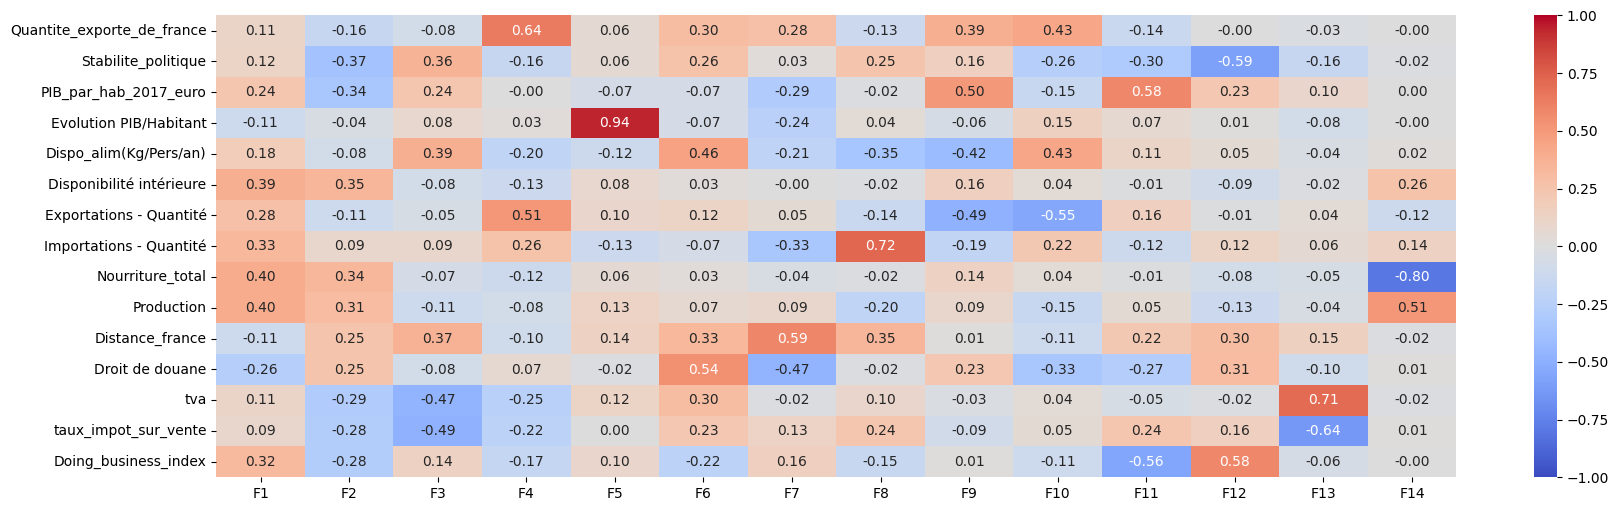

In [40]:
# Affichage du heatmap des correlations
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcst, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

Fonction permettant de tracer les cercles de correlation

In [41]:
def correlation_graph(pca,
                      x_y,
                      features) :# code repris du cours d'Openclassroom
    """Affiche le graphe des correlations

    Positional arguments :
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.02,
                head_length=0.02,
                width=0.01, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.01,
                pca.components_[y, i] + 0.01,
                features[i], fontsize=8)

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [42]:
#projetion des données sur les axes principaux de l'ACP
X_proj = pca.transform(X_scaled)
#X_proj[:5]

Fonction permettant d'afficher les plans factoriels

In [43]:
def display_factorial_planes(   X_projected,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8],
                                marker="." ):# code repris d'openclassroom
    """
    Affiche la projection des individus

    Positional arguments :
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments :
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7,6)

    # On gère les labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    # Les points
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha,
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) :
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()



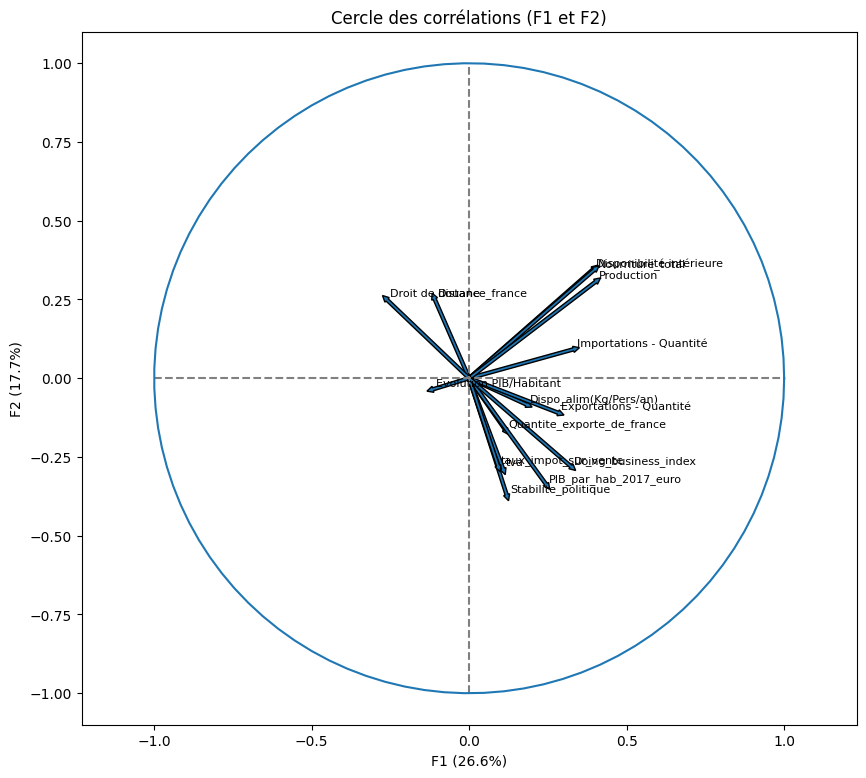

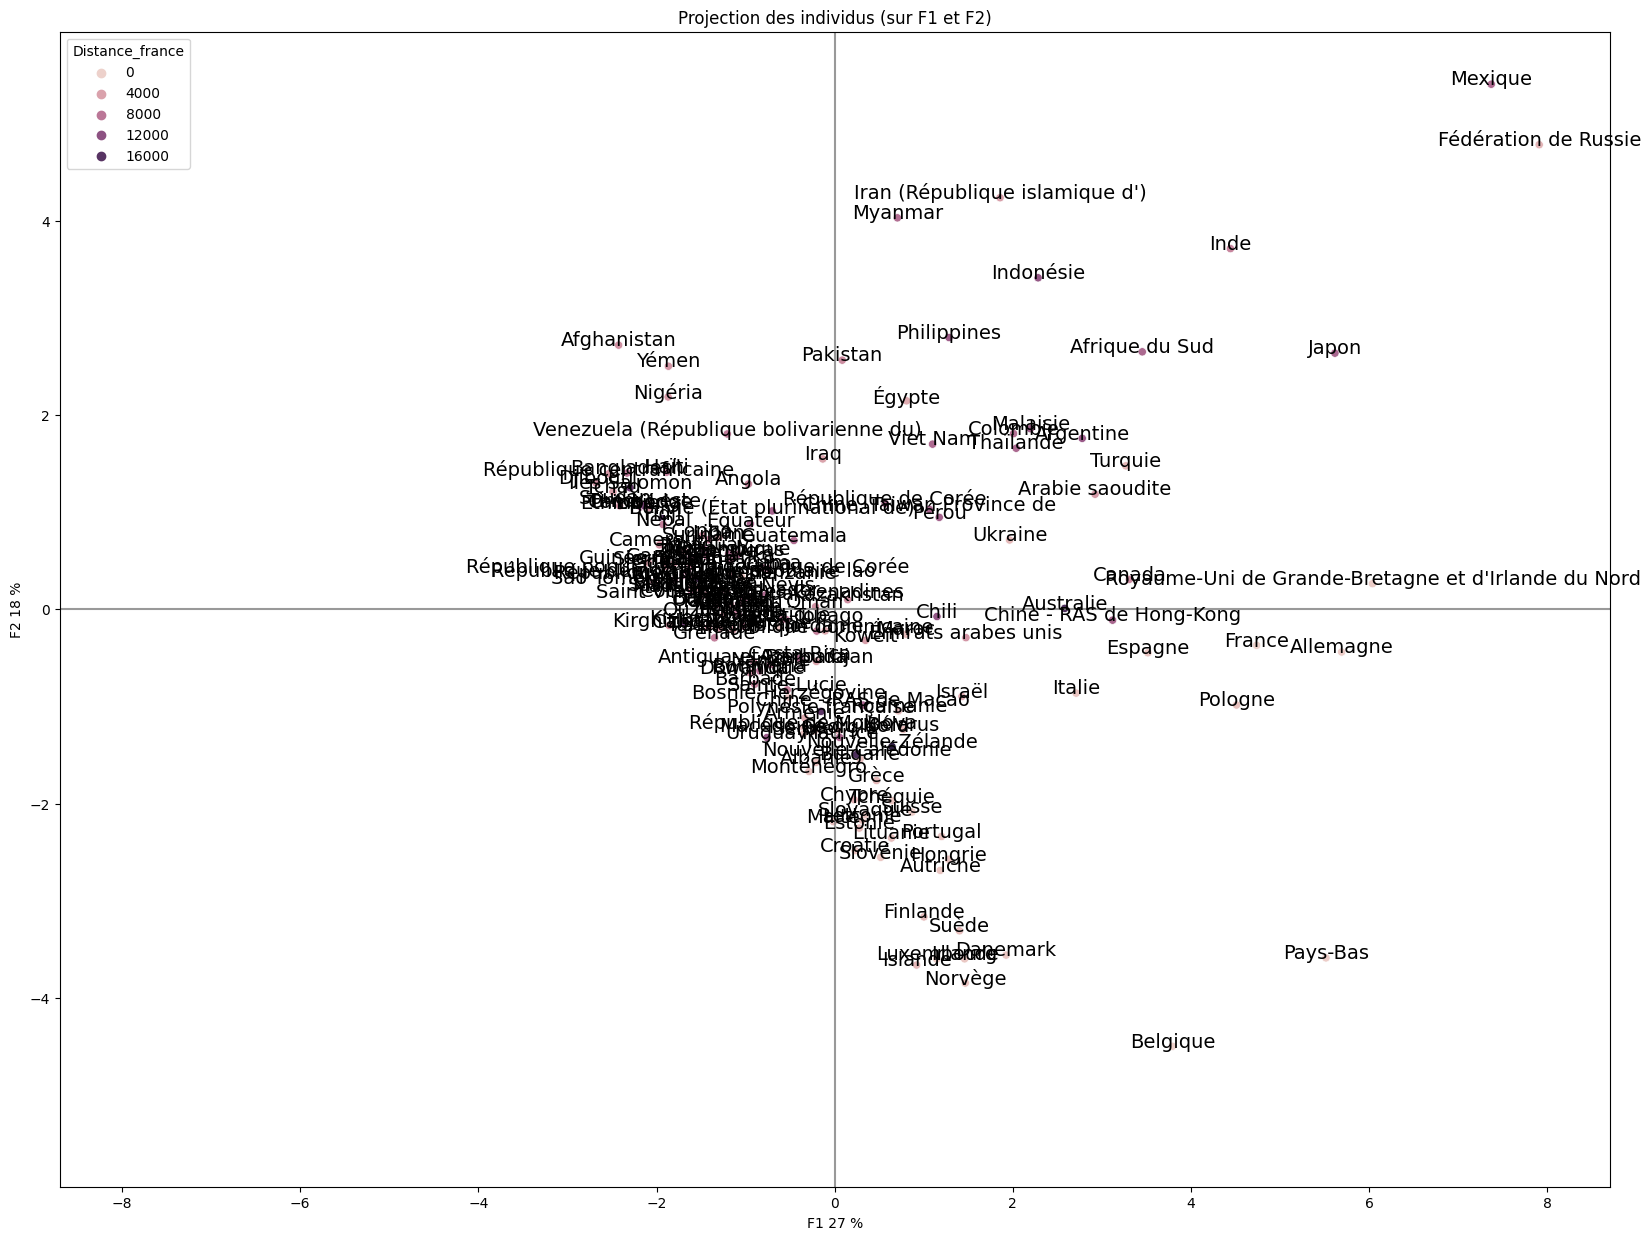

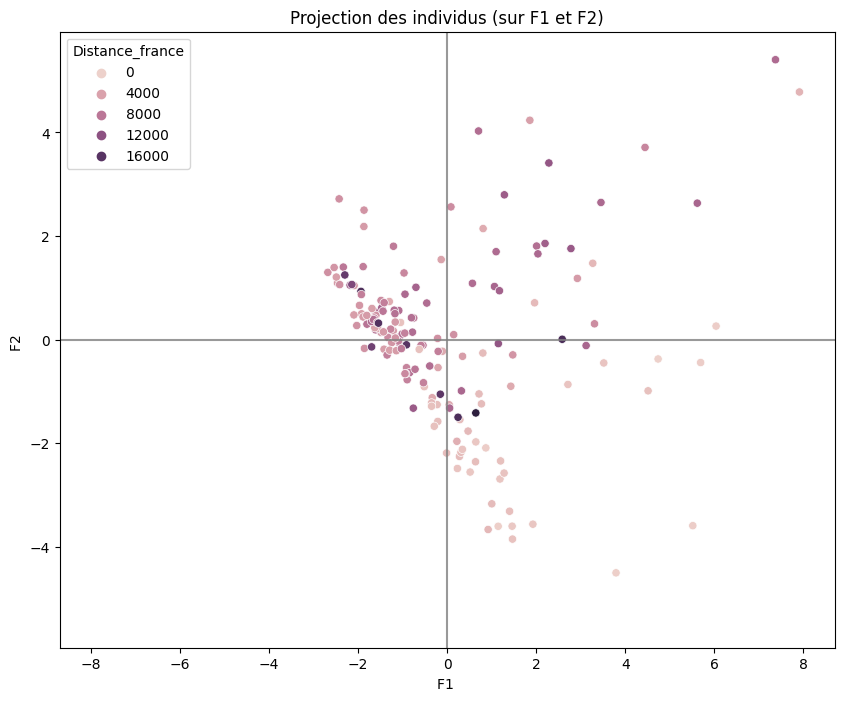

In [44]:
x_y = [0,1] #F1 et F2
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,15), clusters=df['Distance_france'], marker="o")
display_factorial_planes(X_proj, x_y, clusters=df['Distance_france'])


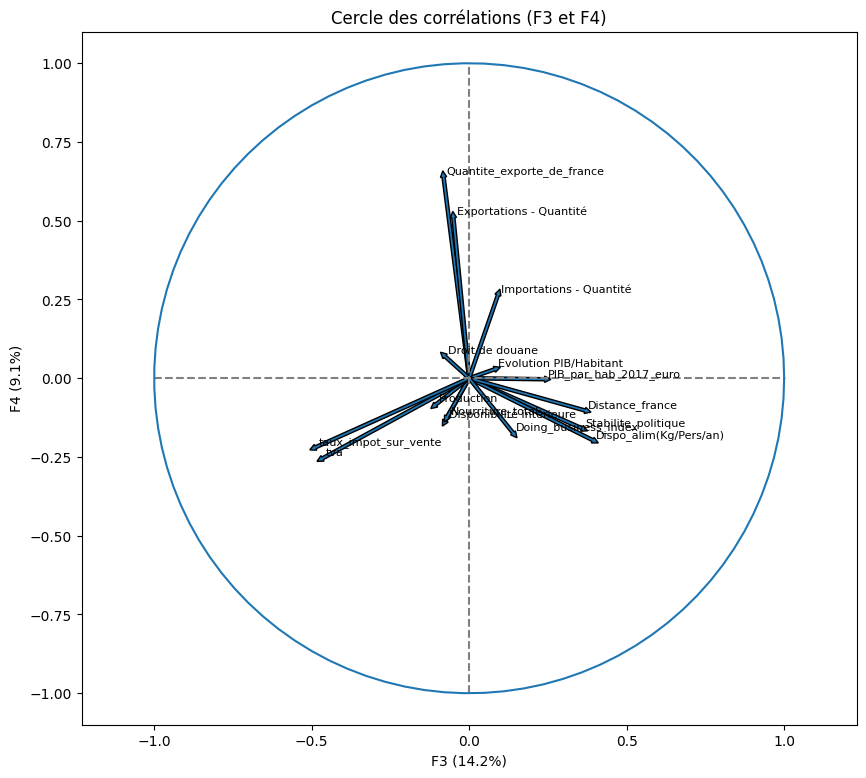

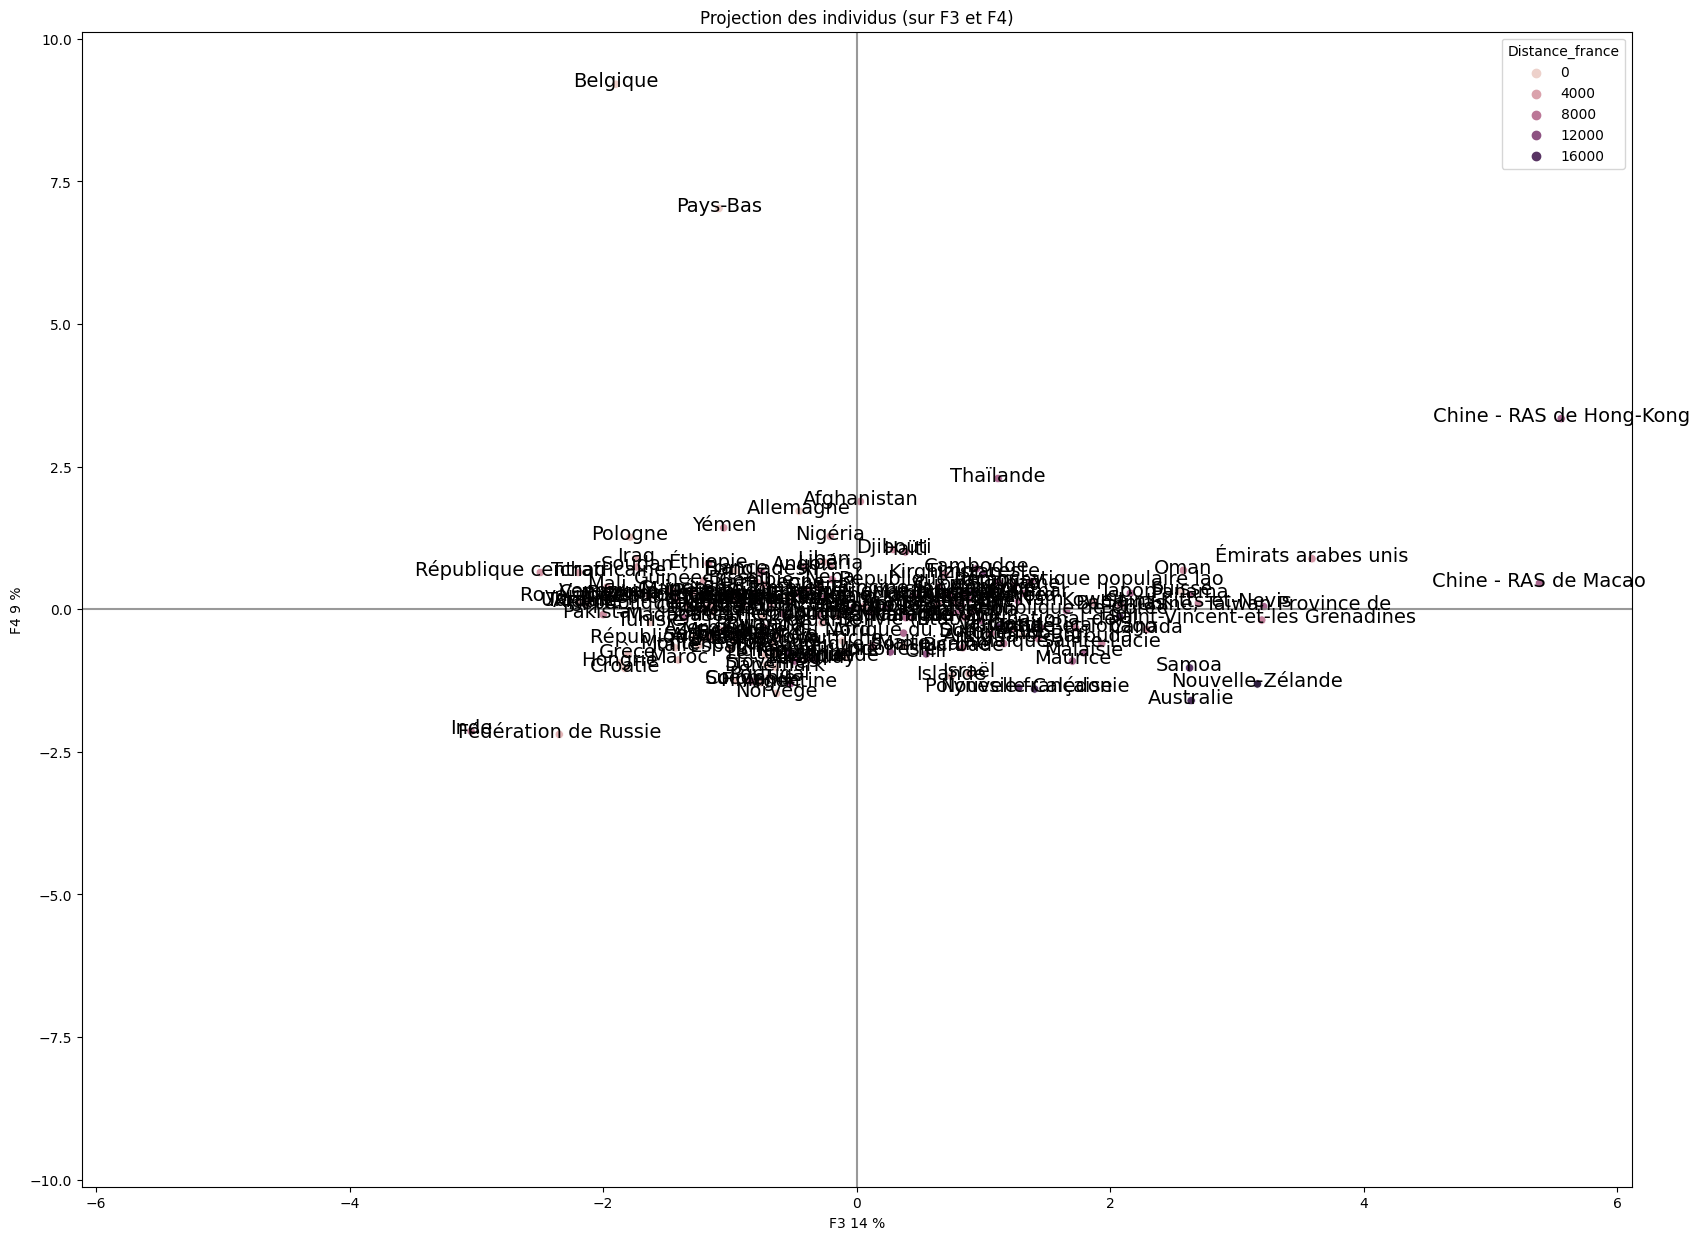

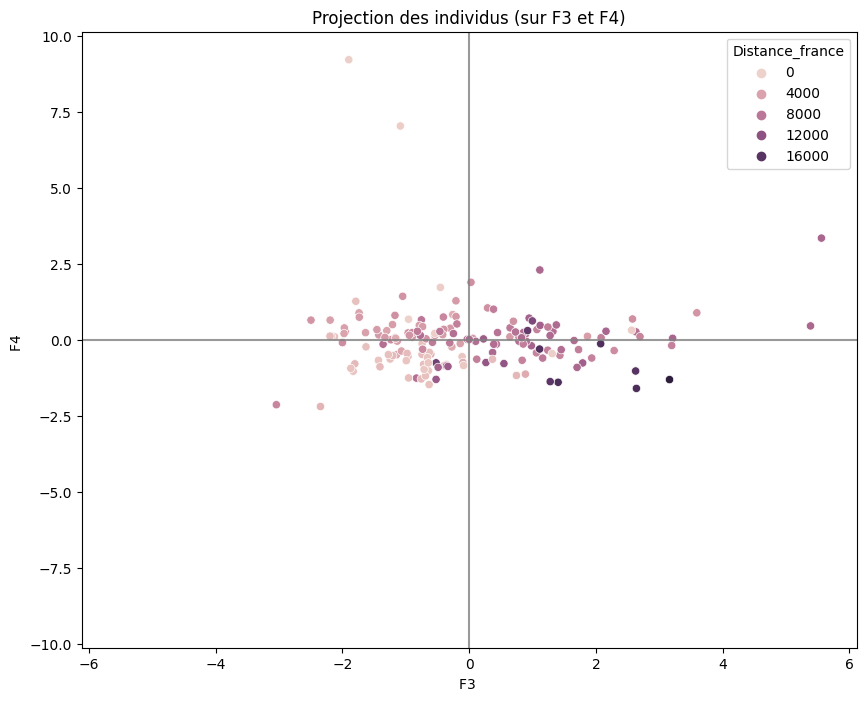

In [45]:
x_y = 2,3 #F3 et F4
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,15), clusters=df['Distance_france'],marker="o")
display_factorial_planes(X_proj, x_y, clusters=df['Distance_france'])


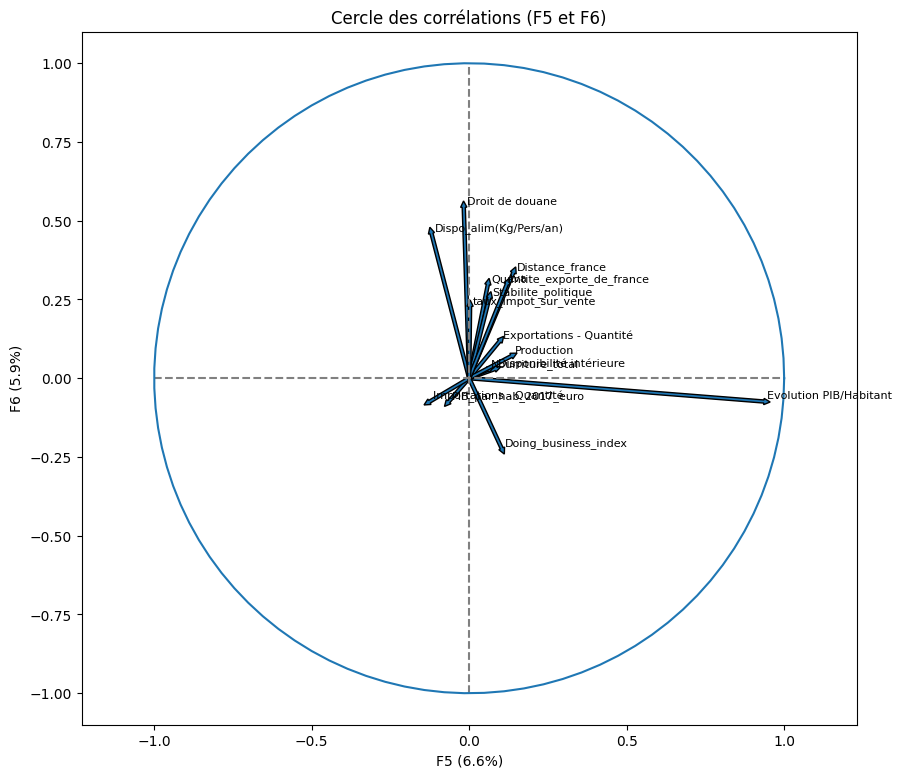

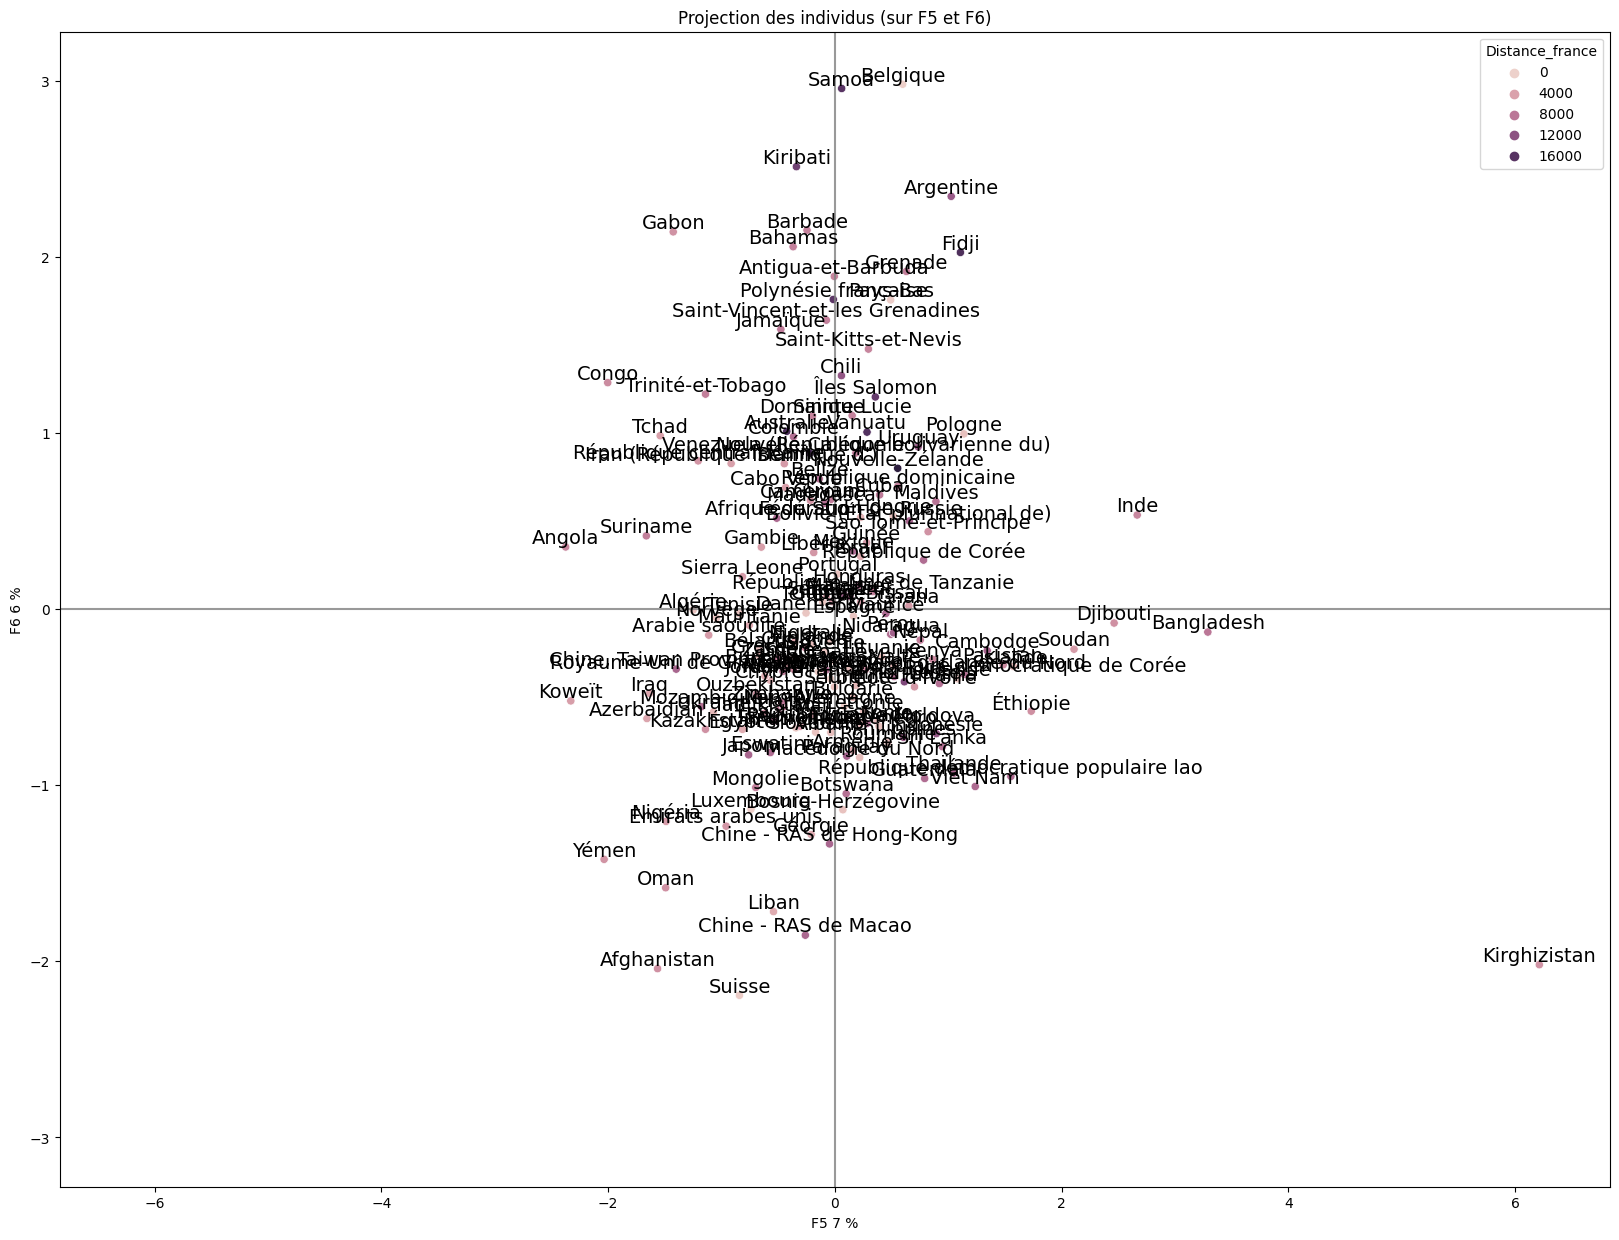

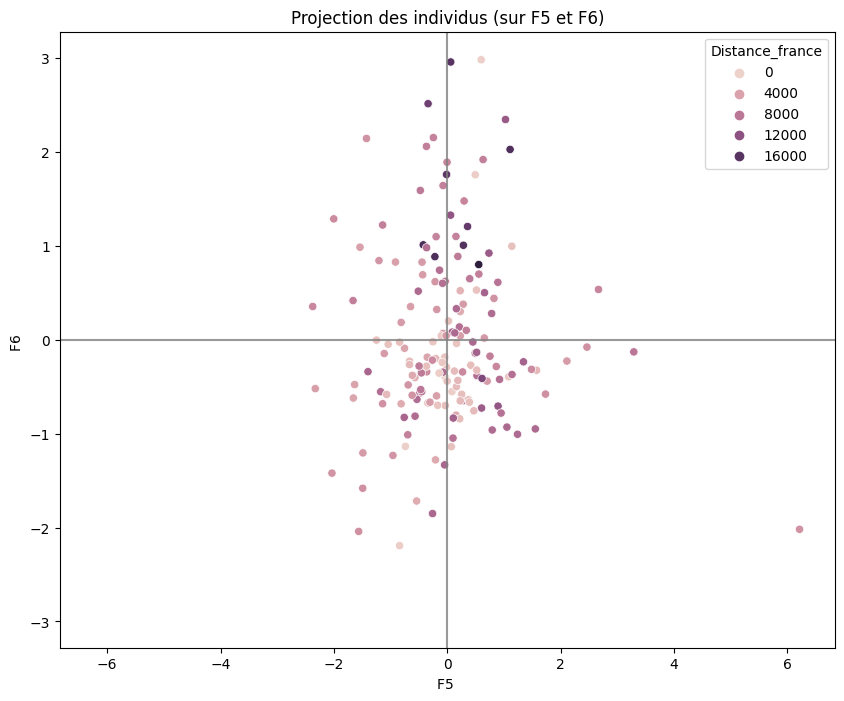

In [46]:
x_y = (4,5) # on veut le cercle de correlation entre F5 et F6
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,15), clusters=df['Distance_france'],marker="o")
display_factorial_planes(X_proj, x_y, clusters=df['Distance_france'])


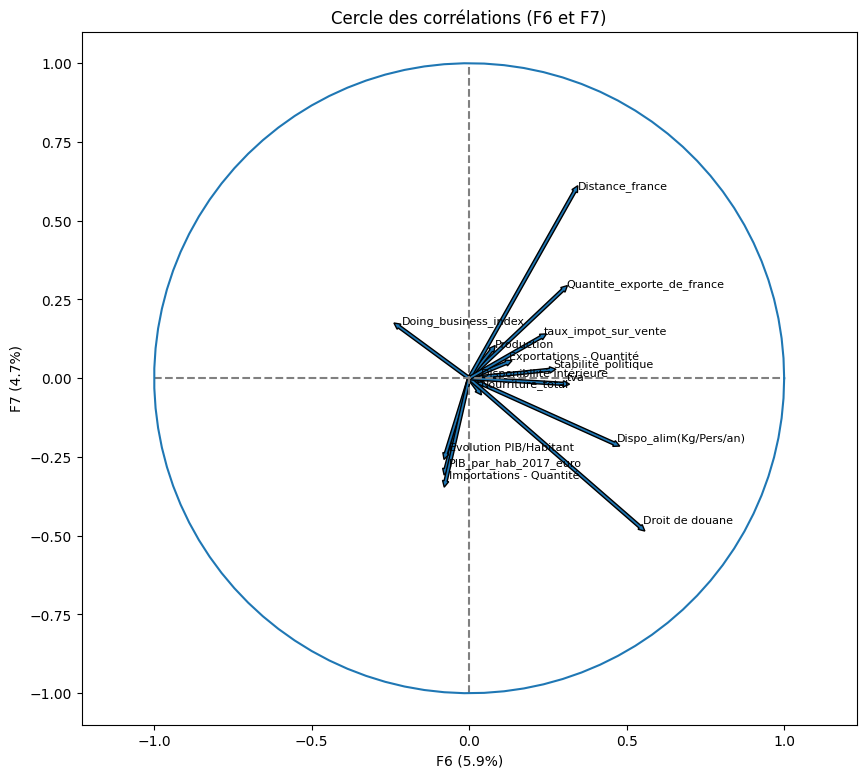

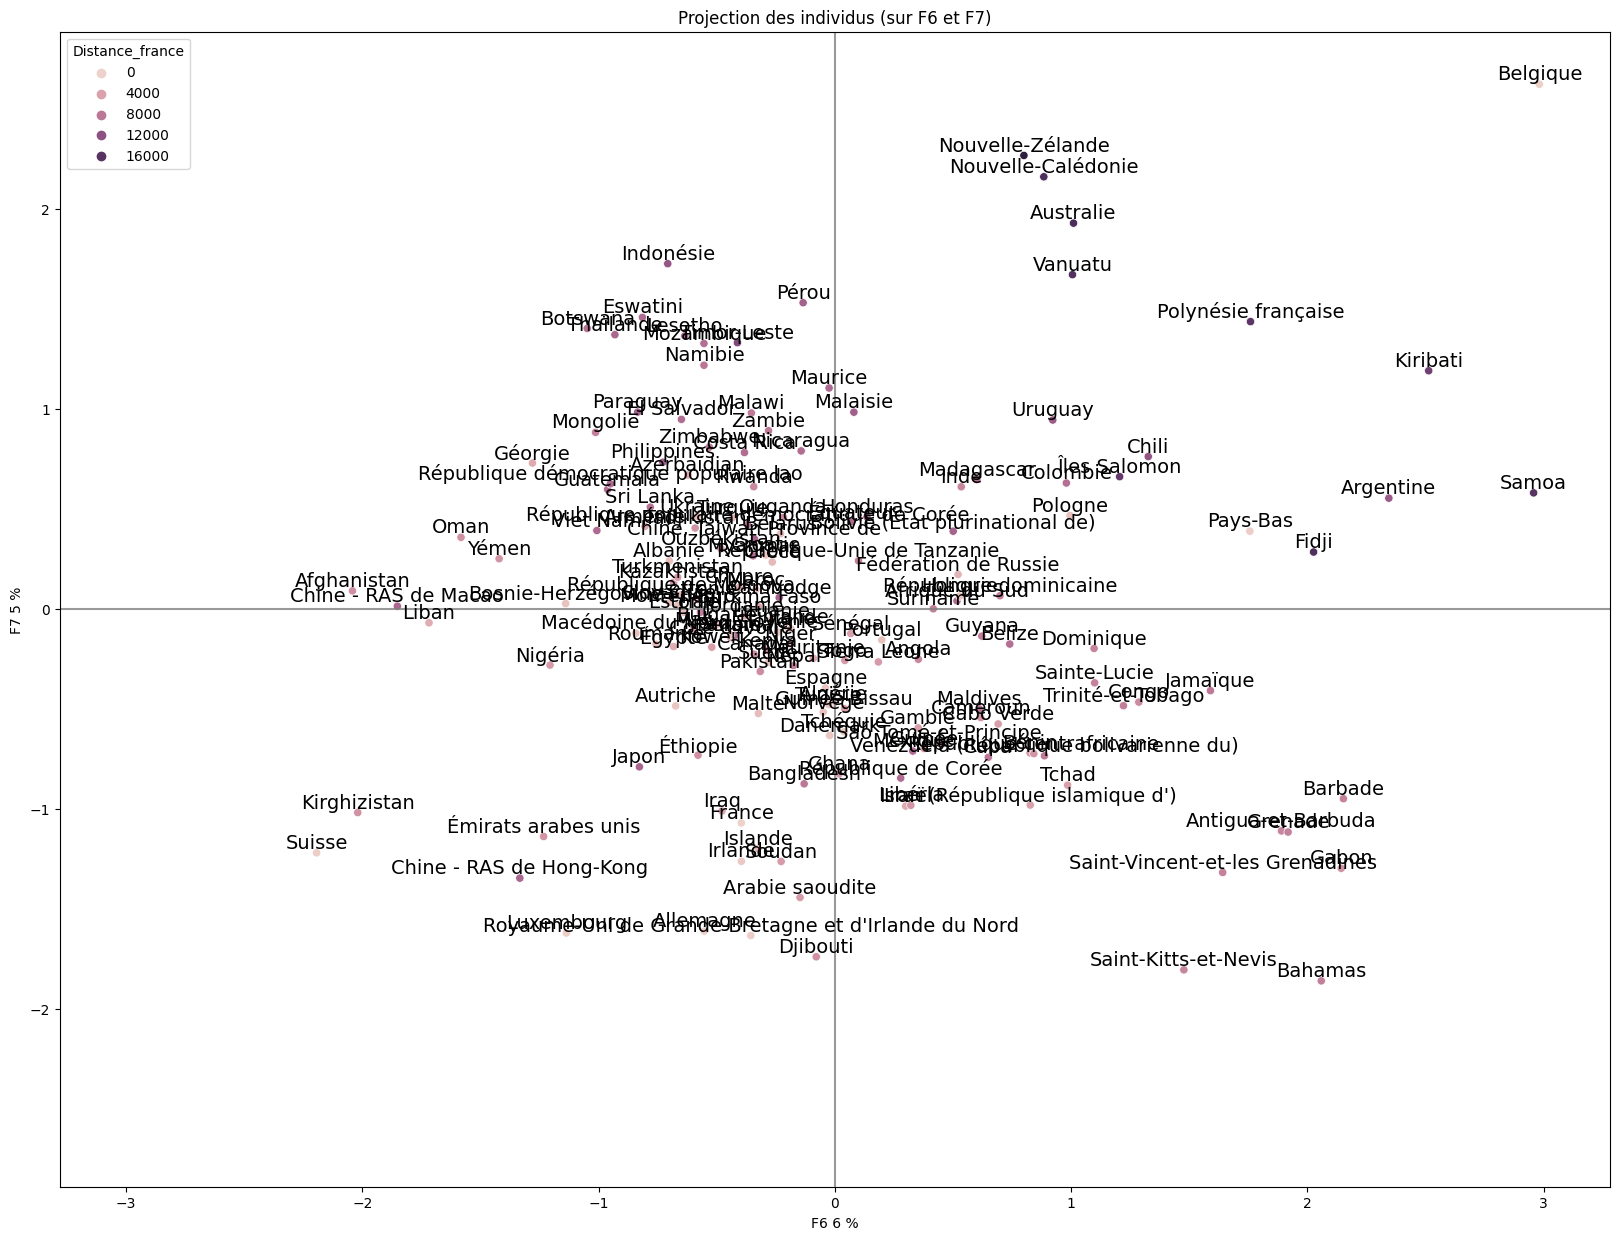

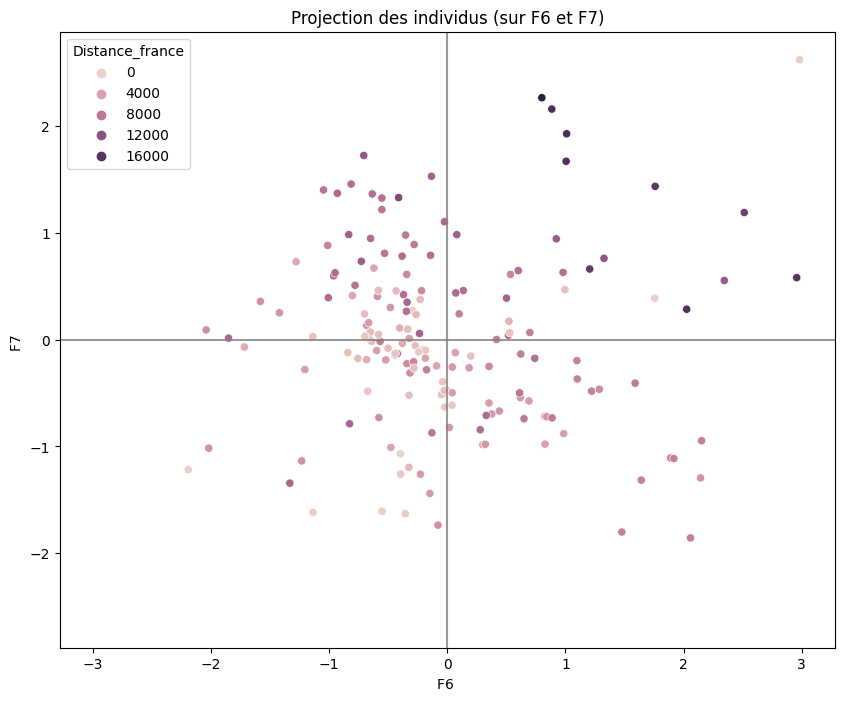

In [47]:
x_y = (5,6) # on veut le cercle de correlation entre F6 et F7
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,15), clusters=df['Distance_france'],marker="o")
display_factorial_planes(X_proj, x_y, clusters=df['Distance_france'])

Identification des axes principaux d'inertie:
* F1 représente la production de poulet des pays
* F2 représente la facilité de faire du business avec les pays producteurs
* F3 représente l'équilibre entre la prospérité économique et le protectionnisme des pays
* F4 représente la part de concurence avec la france sur le marché
* F5 représente la croissance économique des pays
* F6 représente les pays qui cherchent à protéger leur économie locales des importations
* F7 représente les couts d'exportations


**Qu’est ce que l’on veut pour exporter nos Poulet en se basant sur ce que représentent les axes principaux d’inertie ?**
-	Des pays qui ont une production de poulet faible ou peu élevé
-	Des pays ou il est facile de faire du business même s'ils produisent des poulets
-	Des pays qui n'ont pas eu de récéssion économique
-	Des pays qui sont pas ou peu en concurence acvec la France
- Des pays qui ont une croissnce économique stable ou élevé
-	Des pays qui ne protège pas ou pas trop leur économie
-



In [48]:
# affichage des composantes principales par pays
df_compo = pd.DataFrame(X_proj, index=df.index, columns=["F" + str(i+1) for i in range(14)]).iloc[:, :7]
df_compo_tot = pd.DataFrame(X_proj, index=df.index, columns=["F" + str(i+1) for i in range(14)]).iloc[:, :14]
df_compo.head()

,F1,F2,F3,F4,F5,F6,F7
Zone,,,,,,,
Afghanistan,-2.425260,2.718353,0.028928,1.887808,-1.563164,-2.041354,0.091925
Afrique du Sud,3.453517,2.649270,0.370170,-0.418905,-0.511810,0.517196,0.041868
Albanie,-0.210539,-1.576922,-0.965357,-0.557354,-0.034751,-0.700442,0.242117
Algérie,-1.046293,0.332887,-2.123691,0.098470,-1.249779,-0.004373,-0.473106
Allemagne,5.691366,-0.440343,-0.454012,1.720222,0.083436,-0.552236,-1.608923


In [59]:
# Obtention des noms des pays satisfaisants les conditions désirées
noms_pays = df_compo.query('F1>0 & F2<0 & 1>F3>-1 & F4<0 & F5>-1 & F6<0 &-1<F7<1').index.tolist()

# Imprimer les noms des pays
print(noms_pays)
print(len(noms_pays))

['Autriche', 'Bulgarie', 'Bélarus', 'Chypre', 'Danemark', 'Espagne', 'Estonie', 'Finlande', 'Géorgie', 'Lettonie', 'Lituanie', 'Roumanie', 'Slovaquie', 'Slovénie', 'Suède']
15


L'analyse ACP permet de déterminer que 15 pays sont intéressants pour l'exportation de nos poulets:
- L'Autriche
- La Bulgarie
- La biélorussie
- Chypre
- Le Danemark
- L'Espagne
- L'Estonie
- La Finlande
- La Géorgie
- La Lettonie
- La Lituanie
- La Roumanie
- La Slovaquie
- La Slovénie
- La suéde

Avant d'en tirer des conclusions définitives regardont ce que préconisent les méthode de clustering

# Kmeans sur le fichier de base table_fus

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)

on test d'abord avec 7 clusters et on va travailer sur une copy appelé X de df

In [ ]:
X = df.copy()

In [ ]:
#on entraine le model
kmeans.fit(X)

In [ ]:
#on peut calculer son inertie (somme des carrés des distances entre chaque point)
kmeans.inertia_

l'inertie étant très élevés, il semble que les points au point de chaque cluster sont dispersés sur de grande distances par rapport à leur centree

Evaluation du nombre de cluster par la méthode du coude

In [ ]:
#on creer une liste vide pour enregistrer les inerties
inertia = []

In [ ]:
# k_list : notre liste du nombre de cluster
k_list = range(1, 11)
list(k_list)

In [ ]:
#pour chaque nombre de cluster, on instancie un k_means pour k clusters puis on entraine le model et on enregistre l'inertie obtenue dans inertia
for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)
  centroids  = kmeans.cluster_centers_

In [ ]:
inertia

In [ ]:
# affichage du graphique des inerties pour constater la cassure de la courbe
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("inertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, inertia)

In [ ]:
#print("Dimensions des données:", X.shape)
#print("Dimensions des centroids:", centroids.shape)

La méthode du coude semble indiquer qu'il faut prendre 2 clusters. Vérifions cette indication par une autre méthode

In [ ]:
#utilisation de la librairie kneed pour calculer le nombre de cluster

from kneed import KneeLocator

kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")

print(f'Nombre de cluster : {kl.elbow}')


L'utilisation de la librairie kneed qui permet d'identifier le point de coude d'une ligne ajustée aux données indique un nombre de cluster de 2

Evaluation du nombre de cluster par la méthode de la silhouette

In [ ]:
#The Average Silhouette Score
from sklearn.metrics import silhouette_score

silhouette = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(X)
    silhouette.append(silhouette_score(X, km.labels_))

silhouette_series = pd.Series(silhouette, index=range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y=silhouette_series, x=silhouette_series.index)
ax = sns.scatterplot(y=silhouette_series, x=silhouette_series.index, s=150)
ax = ax.set(xlabel='Number of Clusters (k)', ylabel='Average Silhouette Score')

plt.show()

In [ ]:
silhouette_series

La méthode de la silhouette confirme qu'il faut prendre 2 clusters car pour k=2, on a le score silhouette le plus élevé.

Les 3 méthodes s'accordent à dire qu'il faut prendre 2 clusters mais afin d'un peut mieux cibler nos pays, nous allons en prendre 5

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
inertia.append(kmeans.inertia_)
centroids = kmeans.cluster_centers_

In [ ]:
kmeans.labels_

In [ ]:
centroids

In [ ]:
X["cluster"] = kmeans.labels_
X

In [ ]:
def Affichage_cluster(tab):
    for i in range(5):
        cluster = tab[tab['cluster'] == i].index
        print(f"Cluster '{i}' data:")
        print(cluster)
        nb = (tab['cluster'] == i).sum()
        print(f"Nombre d'éléments dans le cluster '{i}': {nb}\n")
        print('______________________________________________________________')


In [ ]:
Affichage_cluster(X)

In [ ]:
def Affichage_boxplot(tab,d,f) :
  plt.figure(figsize=(20, 15))
  sns.set(style="dark")

  for i in range(d,f):
      plt.subplot(6, 3, i+1)
      sns.boxplot(data=tab, x='cluster', y=tab[tab.columns[i]])

  plt.show()


In [ ]:
#détermination des centroides
#def Affichage_moyenne_cluster(tab):
#    pd.options.display.float_format = '{:.2f}'.format
#    pivot = tab.pivot_table(index='cluster', aggfunc='mean')
#    print(pivot)

In [ ]:
#détermination des centroides
X.groupby('cluster').mean()

In [ ]:
#représentation des clusters
Affichage_boxplot(X,0,14)

Détermination des centroides

In [ ]:
#sns.pairplot(X, hue='cluster', palette='viridis')

# Kmeans sur les données résultantes du PCA

In [ ]:
Xpca=df_compo_tot


In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(Xpca)
inertia.append(kmeans.inertia_)
centroids = kmeans.cluster_centers_

In [ ]:
Xpca["cluster"] = kmeans.labels_

In [ ]:
Xpca.head()

In [ ]:
Affichage_boxplot(Xpca,0,14)

In [ ]:
Affichage_cluster(Xpca)

In [ ]:
Xpca.groupby('cluster').mean()

## Dendrogramme ou classification ascendante hierarchique selon la methode de ward

# Dendrograme sur le fichier de base table_fus

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
X = df
Z = linkage(X, method="ward")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 16))

_ = dendrogram(Z, labels=df.index, orientation='left') #truncate_mode="lastp"

plt.title("Dendrogramme de regroupement hiérarchique")
plt.xlabel("Distance.")
#plt.ylabel("Distance.")
plt.show()

on rend le dendrogramme plus lisible en se limitant à 5 groupes (idem nombre de cluster de kmeans)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=5, truncate_mode="lastp")

plt.title("Dendrogramme de regroupement hiérarchique")
plt.xlabel("Nombre de points dans le nœud (ou index du point s'il n'y a pas de parenthèses).")
plt.ylabel("Distance.")
plt.show()

Les résultats obtenues sont très cohérents avec ceux du Kmean pour les données de table_fus, on retrouve le même nombre d'élément par cluster

In [ ]:
#Identification des 5 groupes obtenus
groupes_cah = fcluster(Z, 5, criterion='maxclust')
print('Numérotation de nos groupes : ' + str(np.unique(groupes_cah)))

#Index trié des groupes
idg = np.argsort(groupes_cah)

#Affichage des pays selon leurs groupes
df_groupes_cah = pd.DataFrame(X.index[idg], groupes_cah[idg]).reset_index()
df_groupes_cah = df_groupes_cah.rename(columns={'index':'cluster'})

In [ ]:
#Jointure interne nécessaire pour parvenir à agréger nos données
df_groupes_cah = pd.merge(X, df_groupes_cah, on='Zone')

In [ ]:
df_groupe1_cah = df_groupes_cah[df_groupes_cah['cluster'] == 1]
df_groupe2_cah = df_groupes_cah[df_groupes_cah['cluster'] == 2]
df_groupe3_cah = df_groupes_cah[df_groupes_cah['cluster'] == 3]
df_groupe4_cah = df_groupes_cah[df_groupes_cah['cluster'] == 4]
df_groupe5_cah = df_groupes_cah[df_groupes_cah['cluster'] == 5]

In [ ]:
df_groupes_cah.groupby('cluster').mean()

In [ ]:
df_groupes_cah.head()

In [ ]:
Affichage_boxplot(df_groupes_cah,1,14)

In [ ]:
def Affichage_groupe(tab):
    for i in range(1,6):
        cluster = tab[tab['cluster'] == i].Zone
        print(f"Cluster '{i}' data:")
        print(cluster)
        nb = (tab['cluster'] == i).sum()
        print(f"Nombre d'éléments dans le cluster '{i}': {nb}\n")
        print('______________________________________________________________')


In [ ]:
Affichage_groupe(df_groupes_cah)

In [ ]:
#affichage des noms des pays dans chaque groupes (à partir de table_fus)
print('Groupe1')
print(df_groupe1_cah['Zone'].unique())
print('Nombre de pays :', len(df_groupe1_cah))
print('____________________________________________________________')
print('Groupe2')
print(df_groupe2_cah['Zone'].unique())
print('Nombre de pays :',len(df_groupe2_cah))
print('____________________________________________________________')
print('Groupe3')
print(df_groupe3_cah['Zone'].unique())
print('Nombre de pays :',len(df_groupe3_cah))
print('____________________________________________________________')
print('Groupe4')
print(df_groupe4_cah['Zone'].unique())
print('Nombre de pays :',len(df_groupe4_cah))
print('____________________________________________________________')
print('Groupe5')
print(df_groupe5_cah['Zone'].unique())
print('Nombre de pays :',len(df_groupe5_cah))
print('____________________________________________________________')

# Dendrogramme sur la résultante du PCA

In [ ]:
X = df_compo_tot
Z = linkage(X, method="ward")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 16))

_ = dendrogram(Z, labels=df.index, orientation='left') #truncate_mode="lastp"

plt.title("Dendrogramme de regroupement hiérarchique")
plt.xlabel("Distance.")
plt.ylabel("Pays")
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=5, truncate_mode="lastp")

plt.title("Dendrogramme de regroupement hiérarchique")
plt.xlabel("Nombre de points dans le nœud (ou index du point s'il n'y a pas de parenthèses).")
plt.ylabel("Distance.")
plt.show()


In [ ]:
#Identification des 5 groupes obtenus
groupes_cah_pca = fcluster(Z, 5, criterion='maxclust')
print('Numérotation de nos groupes : ' + str(np.unique(groupes_cah_pca)))

#Index trié des groupes
idg = np.argsort(groupes_cah_pca)

#Affichage des pays selon leurs groupes
df_groupes_cah_pca = pd.DataFrame(df_compo.index[idg], groupes_cah_pca[idg]).reset_index()
df_groupes_cah_pca = df_groupes_cah_pca.rename(columns={'index':'cluster'})



In [ ]:
#Intégration des groupes dans notre échantillon de départ représenté par le dataframe "df_alim"
#Jointure interne nécessaire pour parvenir à agréger nos données
df_groupes_cah_pca = pd.merge(df_compo, df_groupes_cah_pca, on='Zone')

In [ ]:
#Aperçu des 5 premières lignes
#df_groupes_cah.to_csv('p5_data/pays_groupes5_dendrogramme.csv')
df_groupes_cah_pca.head()



In [ ]:
df_groupe1_cah_pca = df_groupes_cah_pca[df_groupes_cah_pca['cluster'] == 1]
df_groupe2_cah_pca = df_groupes_cah_pca[df_groupes_cah_pca['cluster'] == 2]
df_groupe3_cah_pca = df_groupes_cah_pca[df_groupes_cah_pca['cluster'] == 3]
df_groupe4_cah_pca = df_groupes_cah_pca[df_groupes_cah_pca['cluster'] == 4]
df_groupe5_cah_pca = df_groupes_cah_pca[df_groupes_cah_pca['cluster'] == 5]

In [ ]:
#Première comparaison des moyennes afin d'identifier le groupe de pays le plus porteur à ce niveau de l'analyse
df_groupes_cah_pca.groupby('cluster').mean()



In [ ]:
df_groupes_cah_pca.rename(columns={'F1' : 'Disponibilité alimentaire', 'F2' : 'Niveau de développement','F3' : 'Diversité alimentaire' , 'F4' : 'Evolution économique', 'F5' : 'Instabilité économique', 'F6' : 'Dépendence alimentaire', 'F7' : 'Compétitivité alimentaire'}, inplace=True)

In [ ]:
Affichage_boxplot(X,0,8)

In [ ]:
#affichage des noms des pays dans chaque groupes (à partir de table_fus)
print('Groupe1')
print(df_groupe1_cah_pca['Zone'].unique())
print('Nombre de pays :', len(df_groupe1_cah))
print('____________________________________________________________')
print('Groupe2')
print(df_groupe2_cah_pca['Zone'].unique())
print('Nombre de pays :',len(df_groupe2_cah))
print('____________________________________________________________')
print('Groupe3')
print(df_groupe3_cah_pca['Zone'].unique())
print('Nombre de pays :',len(df_groupe3_cah))
print('____________________________________________________________')
print('Groupe4')
print(df_groupe4_cah_pca['Zone'].unique())
print('Nombre de pays :',len(df_groupe4_cah))
print('____________________________________________________________')
print('Groupe5')
print(df_groupe5_cah_pca['Zone'].unique())
print('Nombre de pays :',len(df_groupe5_cah))
print('____________________________________________________________')

In [ ]:
#affichage des noms des pays dans chaque groupes
print('Groupe1 pca')
print(df_groupe1_cah_pca['Zone'].unique())
print('-----------------------------------------------------------')
print('Groupe1 fichier de base')
print(df_groupe1_cah['Zone'].unique())
print('____________________________________________________________')
print("")
print('Groupe2 pca')
print(df_groupe2_cah_pca['Zone'].unique())
print('-----------------------------------------------------------')
print('Groupe2 fichier de base')
print(df_groupe2_cah['Zone'].unique())
print("")
print('____________________________________________________________')
print('Groupe3 pca')
print(df_groupe3_cah_pca['Zone'].unique())
print('-----------------------------------------------------------')
print('Groupe3 fichier de base')
print(df_groupe3_cah['Zone'].unique())
print("")
print('____________________________________________________________')
print('Groupe4 pca')
print(df_groupe4_cah_pca['Zone'].unique())
print('-----------------------------------------------------------')
print('Groupe4 fichier de base')
print(df_groupe4_cah['Zone'].unique())
print("")
print('____________________________________________________________')
print('Groupe5 pca')
print(df_groupe5_cah_pca['Zone'].unique())
print('-----------------------------------------------------------')
print('Groupe5 fichier de base')
print(df_groupe5_cah['Zone'].unique())
print("")
print('____________________________________________________________')

In [ ]:
Affichage_cluster(df_groupes_cah_pca)